In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import sys
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

sys.path.append('..')
from utils import *
from data import *
from plotting import *

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 0
mpl.rcParams['figure.dpi']= 100

sns.set_style('whitegrid')
sns.set_palette('cubehelix')

In [4]:
kids_x_sdss = process_kids(os.path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.x.SDSS.DR14.fits'),
                           columns=COLUMNS_KIDS_ALL+COLUMNS_SDSS, sdss_cleaning=True)

Data shape: (152244, 49)
Droping NANs: 130777 (85.90%) left
Cleaning SDSS: 122964 left


In [5]:
kids = process_kids(os.path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.500k.fits'))

Data shape: (501754, 306)
Droping NANs: 226903 (45.22%) left


In [6]:
print(get_column_desc(kids_x_sdss['CLASS']))

GALAXY - 84728 (68.90%)
QSO - 13611 (11.07%)
STAR - 24625 (20.03%)


In [7]:
def add_cut_label(data):
    data['cut_label'] = 'remaining'
    data.loc[data[get_mag_str('r')] > 22, 'cut_label'] = 'r > 22'
    data.loc[data[get_mag_str('r')] > 23, 'cut_label'] = 'r > 23'
    data.loc[data[get_mag_str('r')] > 24, 'cut_label'] = 'r > 24'
    return data

In [8]:
kids_merged = kids.append(kids_x_sdss.loc[~kids['ID'].isin(kids_x_sdss['ID'])], sort=False)
kids_merged = add_cut_label(kids_merged)
kids_merged['is_in_SDSS'] = kids_merged['ID'].isin(kids_x_sdss['ID'])
kids_merged['CLASS'] = kids_merged['CLASS'].fillna(value='not SDSS')

# Data amount vs maximum magnitude

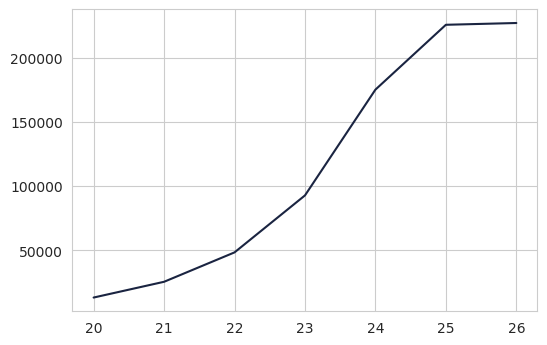

In [10]:
# Data cuts
r_max = kids[get_mag_str('r')].max()
size_max = kids.shape[0]
x = range(20, int(r_max) + 1, 1)
y = [kids.loc[kids[get_mag_str('r')] < r_m].shape[0] for r_m in range(20, int(r_max) + 1, 1)]
plt.plot(x, y)

In [13]:
for i, j in enumerate(x):
    print(j, y[i])

20 13249
21 25518
22 48387
23 92732
24 175045
25 225503
26 226889


# KiDS and SDSS feature histograms

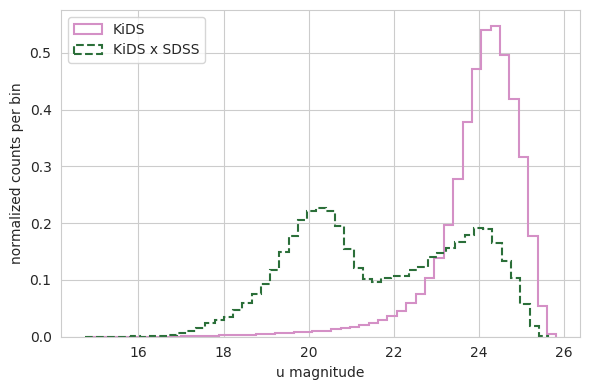

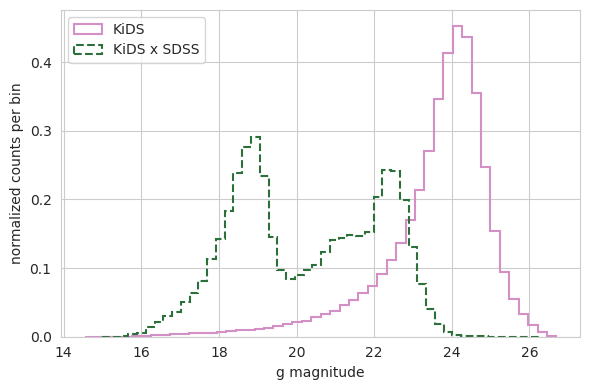

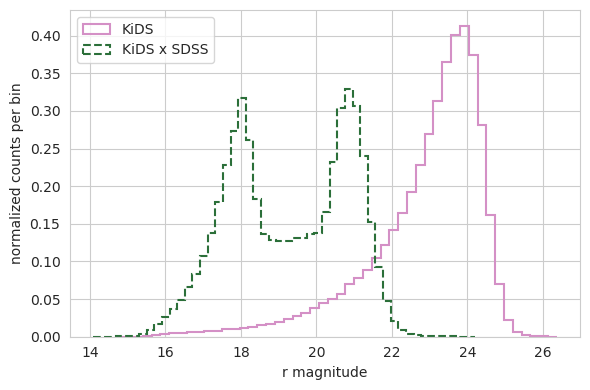

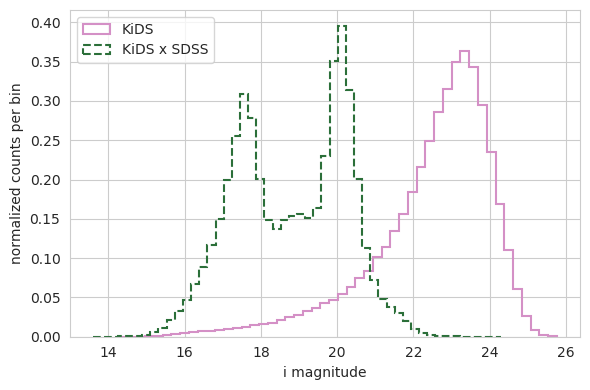

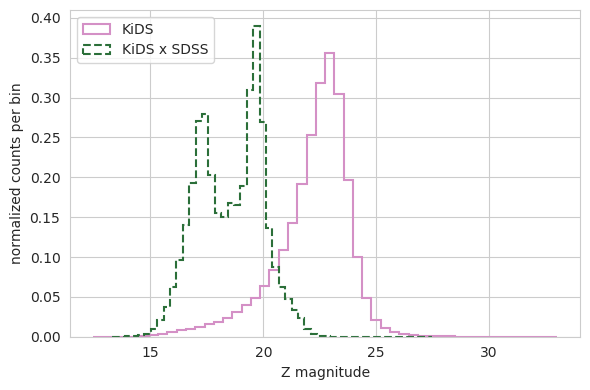

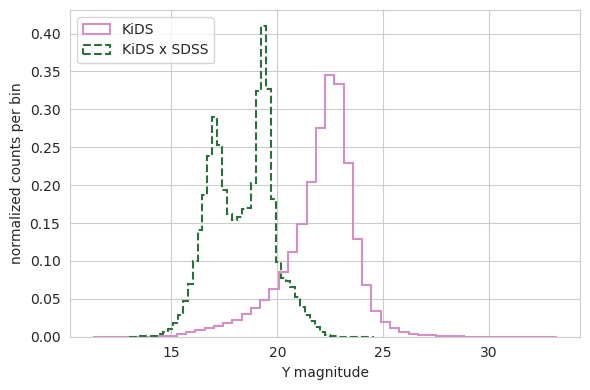

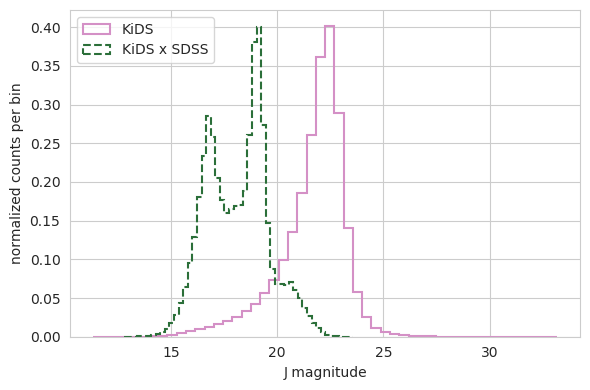

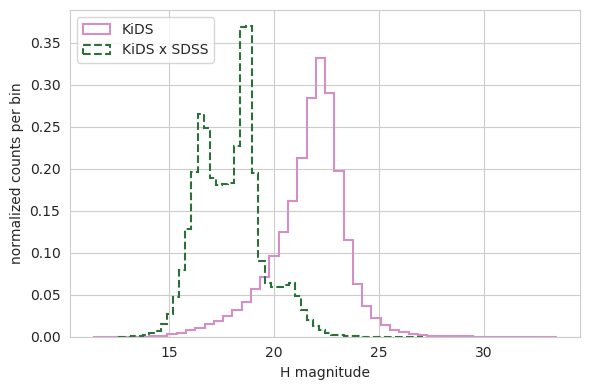

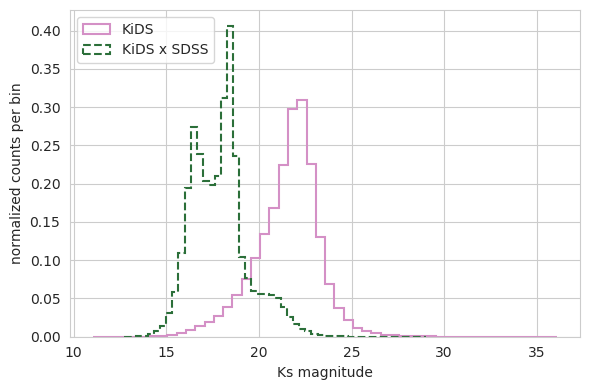

In [9]:
# Magnitude histograms
data_dict = OrderedDict([('KiDS', kids), ('KiDS x SDSS', kids_x_sdss)])
plot_histograms(data_dict, BAND_COLUMNS, legend_size=10, pretty_print_function=pretty_print_feature)

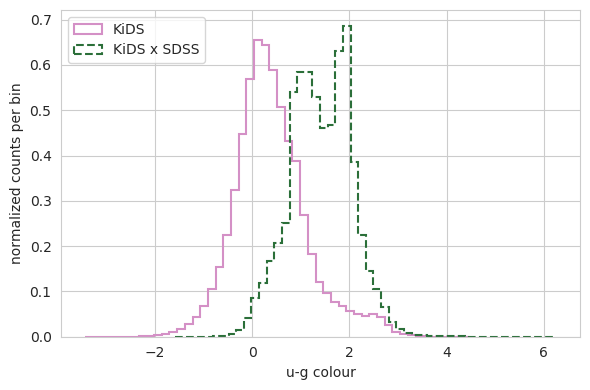

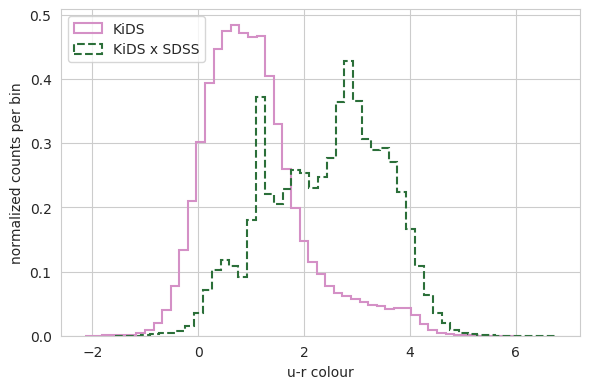

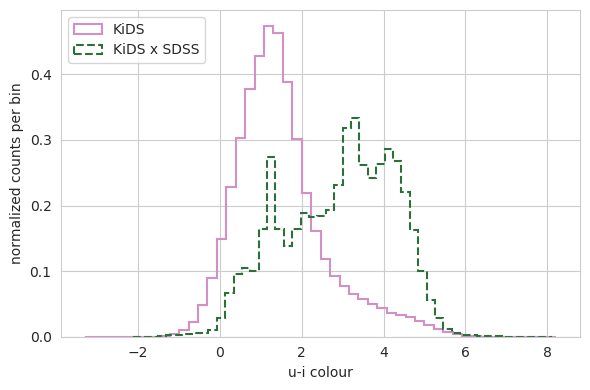

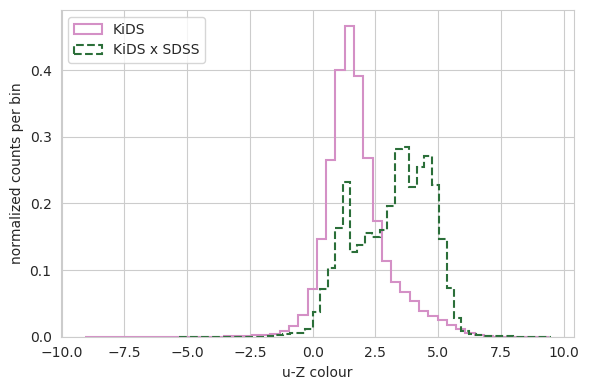

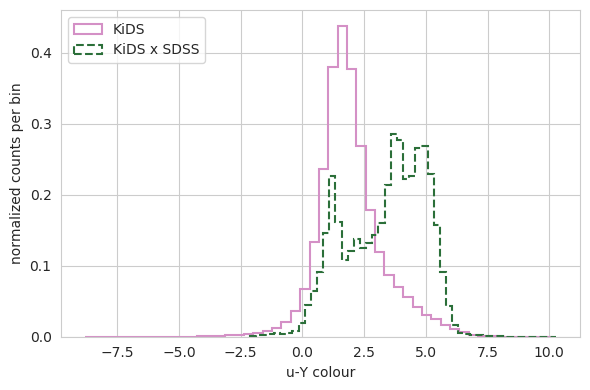

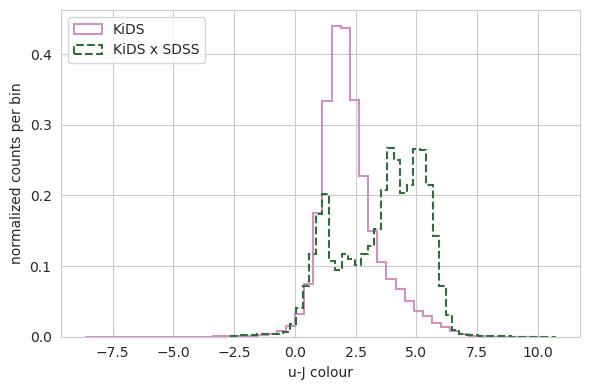

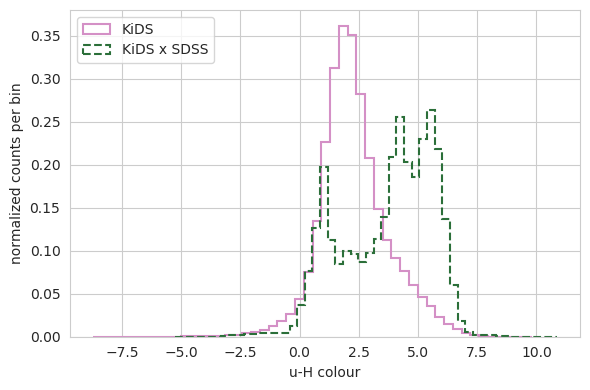

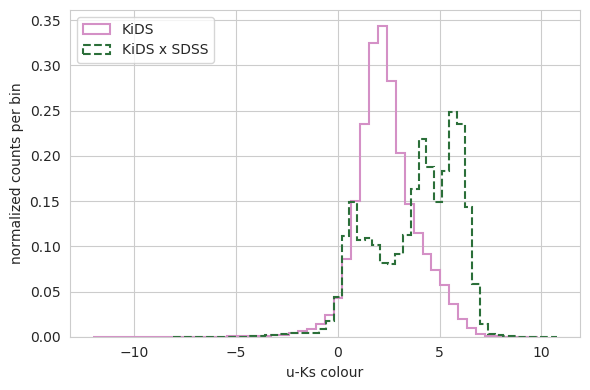

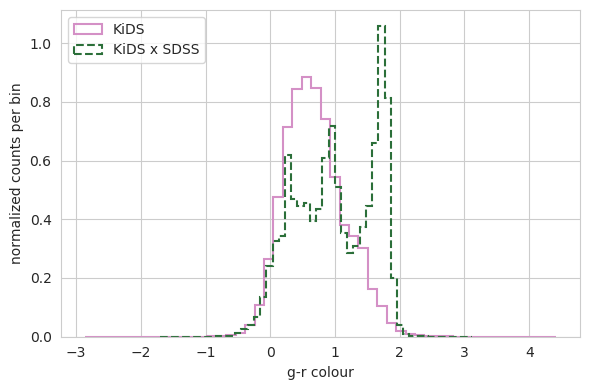

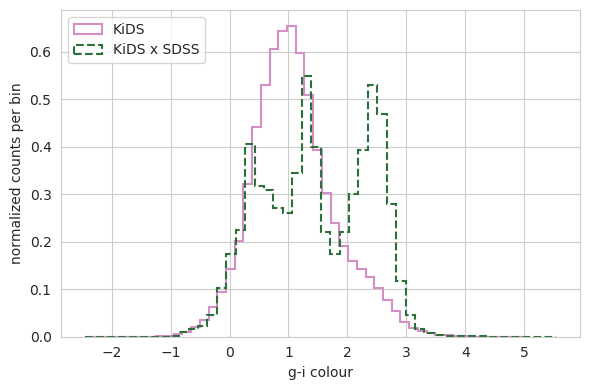

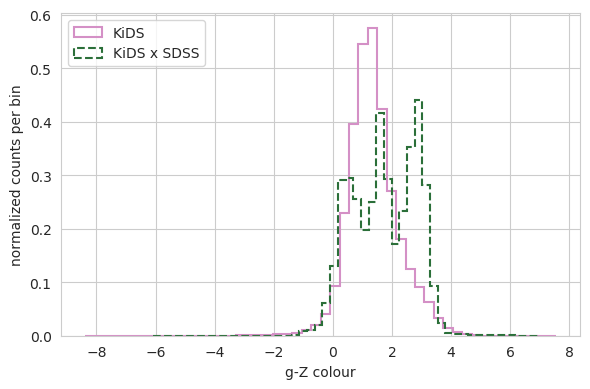

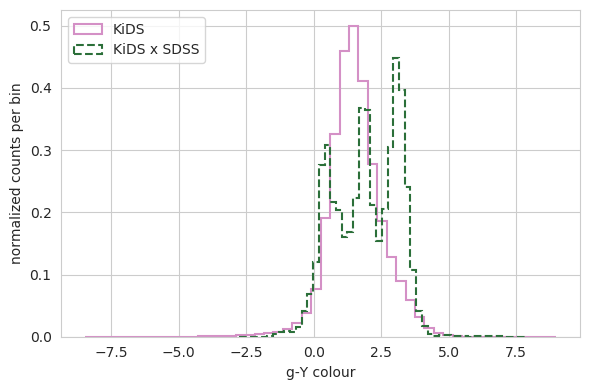

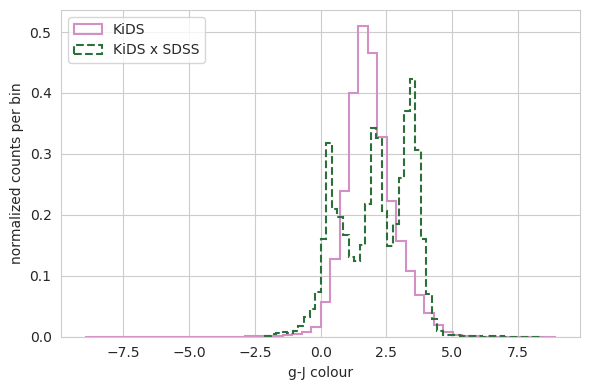

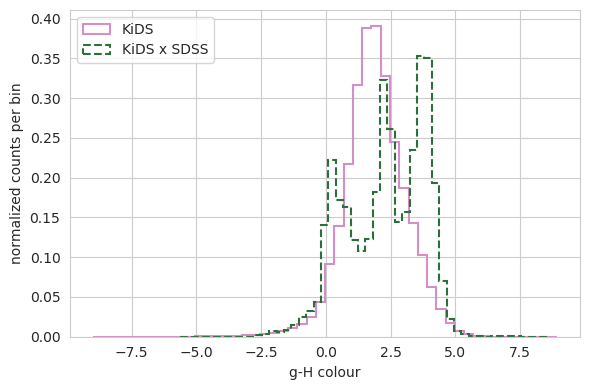

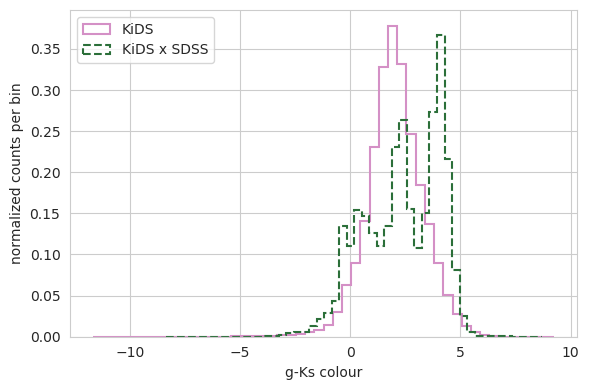

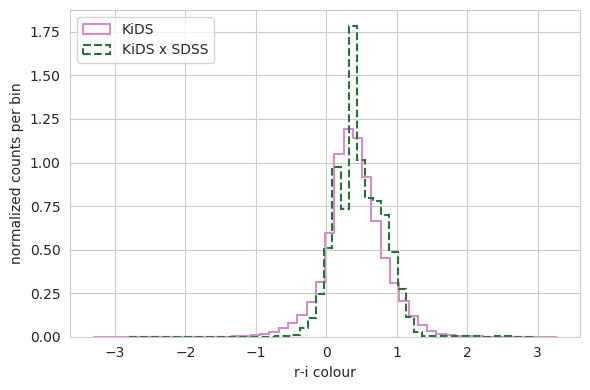

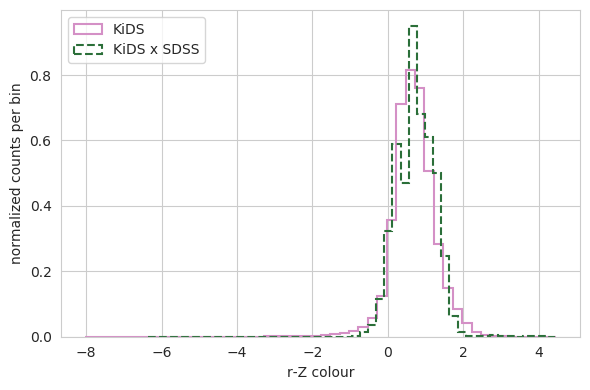

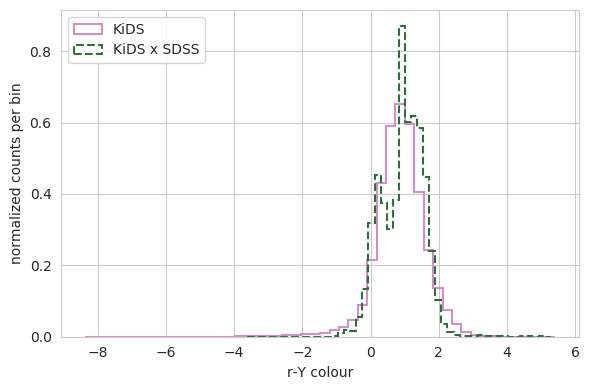

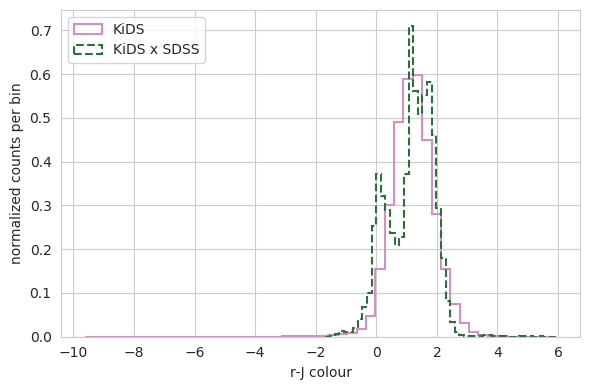

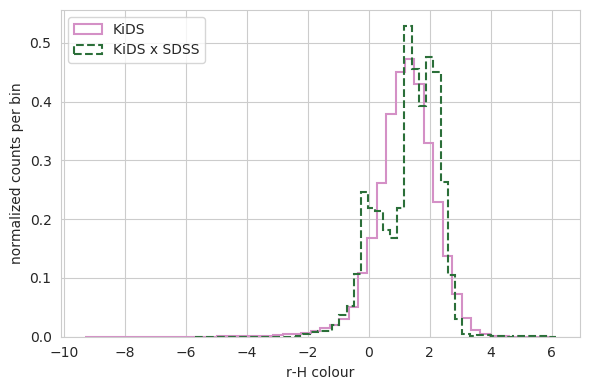

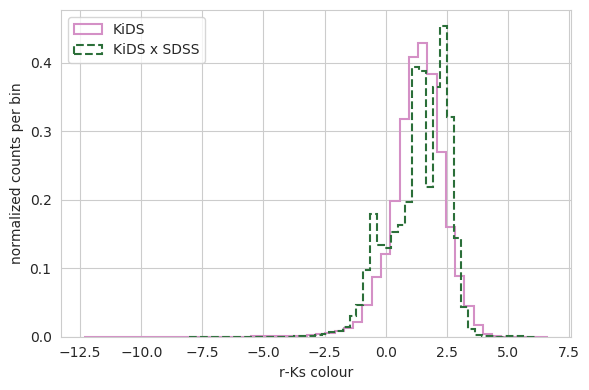

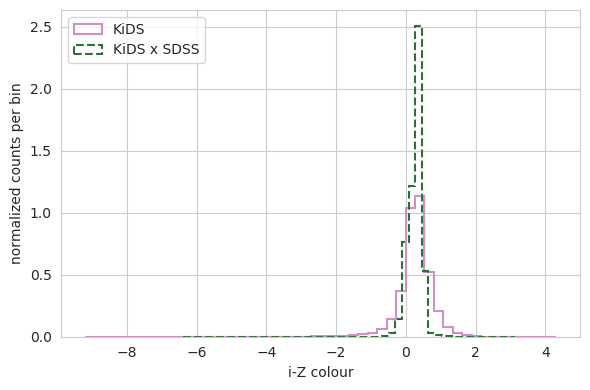

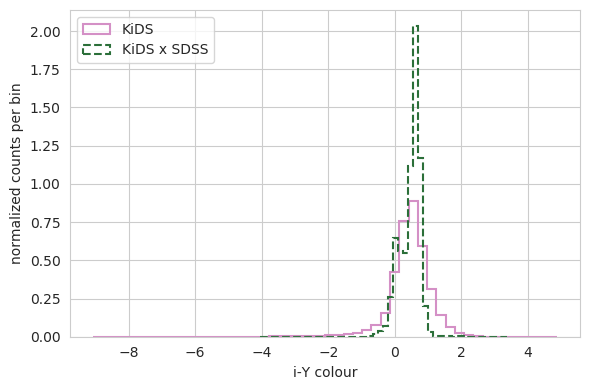

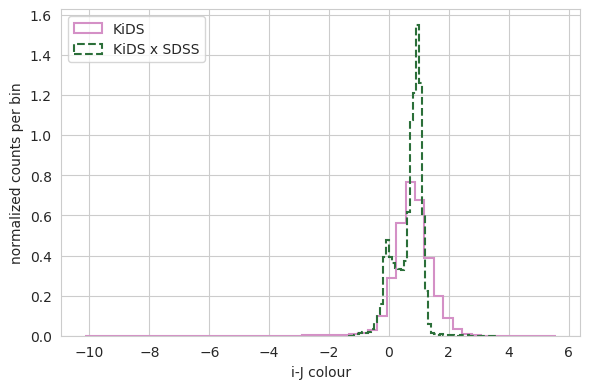

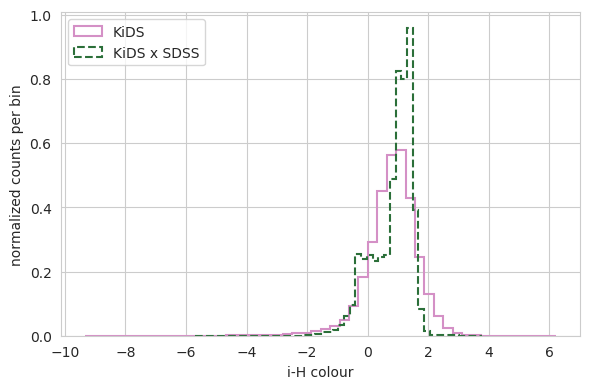

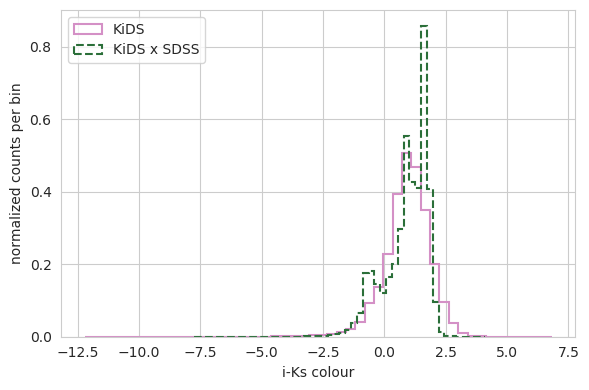

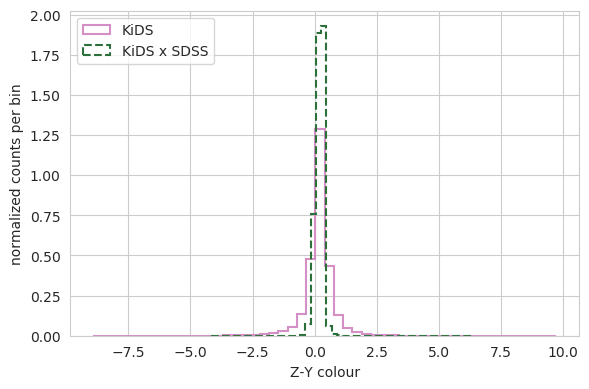

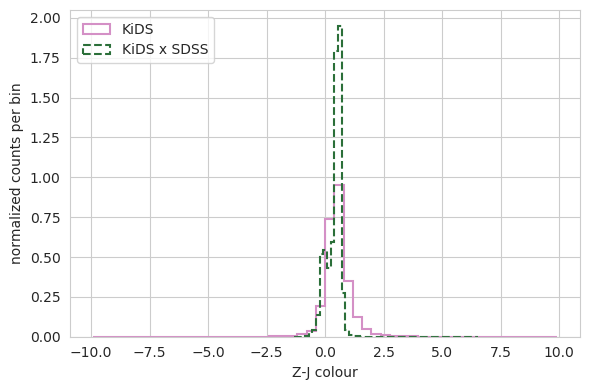

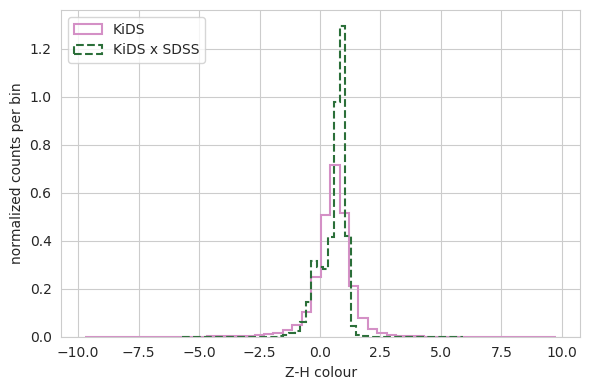

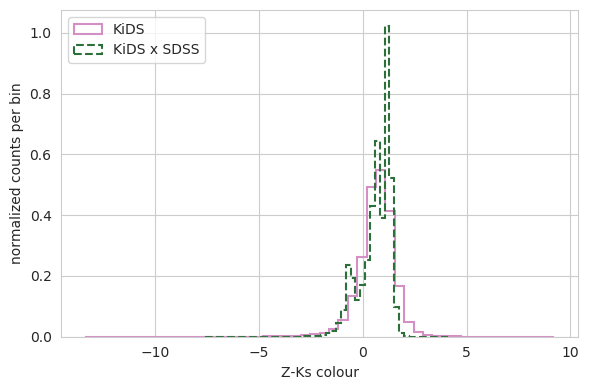

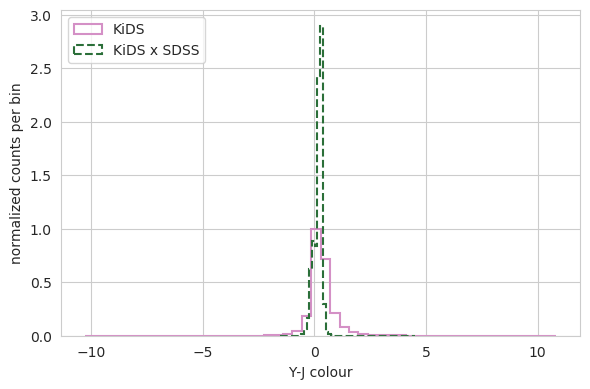

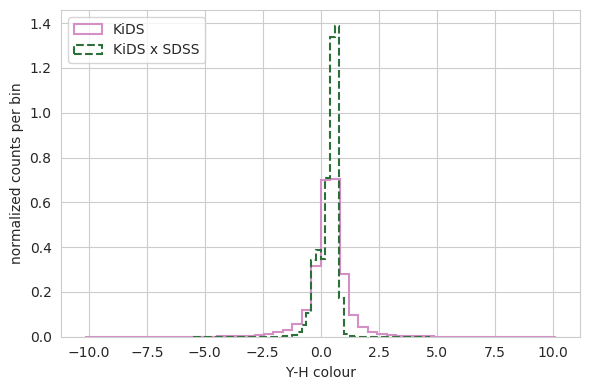

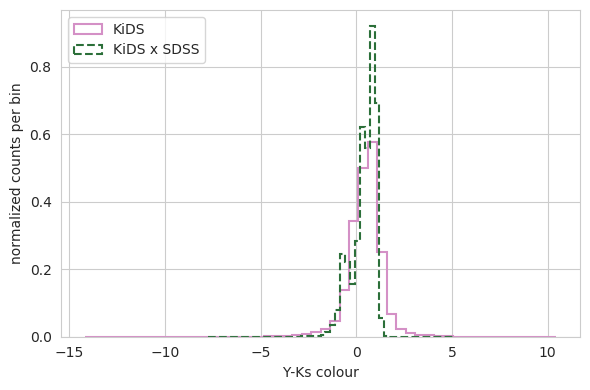

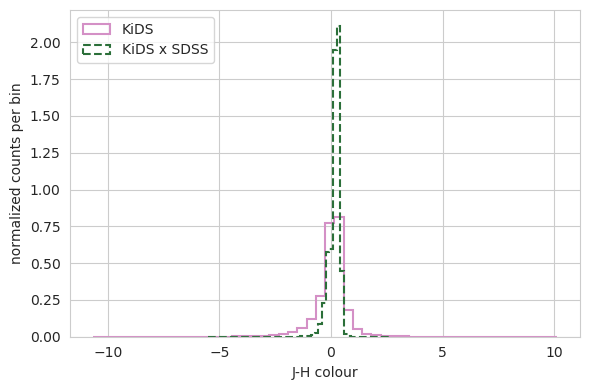

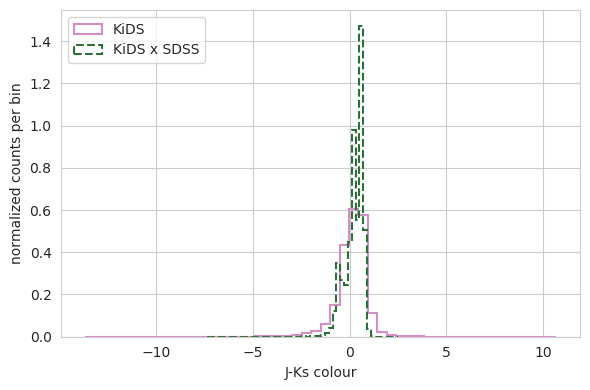

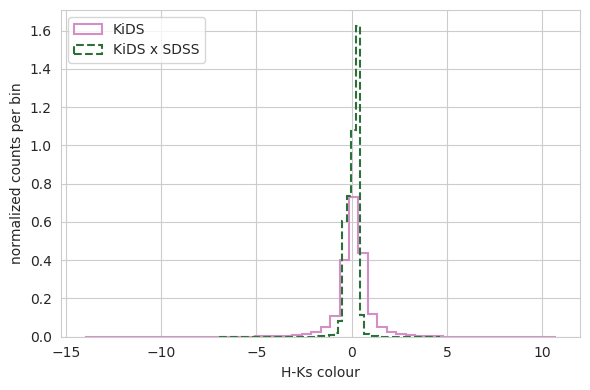

In [10]:
# Color histograms
data_dict = OrderedDict([('KiDS', kids), ('KiDS x SDSS', kids_x_sdss)])
#x_lim_dict = {COLOR_GAAP_STR.format('u', 'g'': (-2, 4)}
plot_histograms(data_dict, COLOR_COLUMNS, legend_size=10, pretty_print_function=pretty_print_feature)

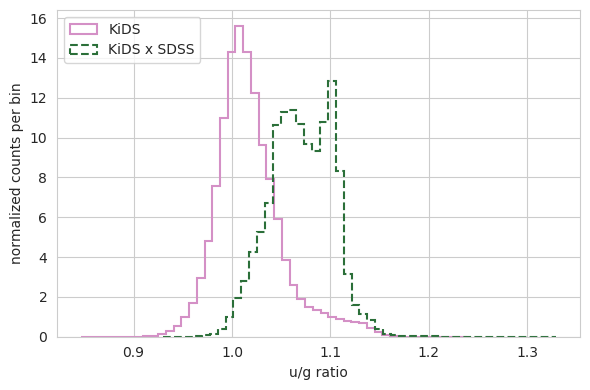

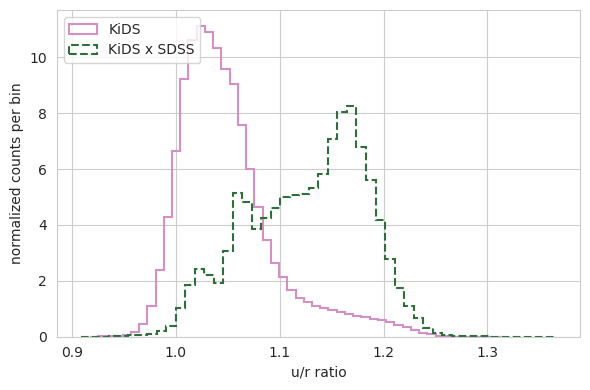

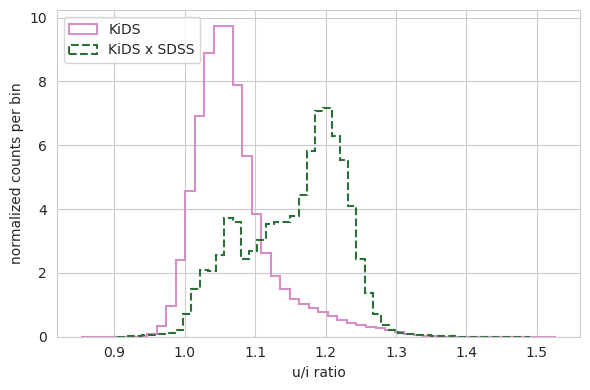

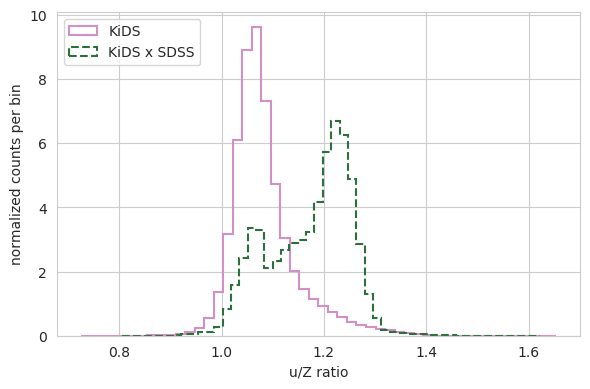

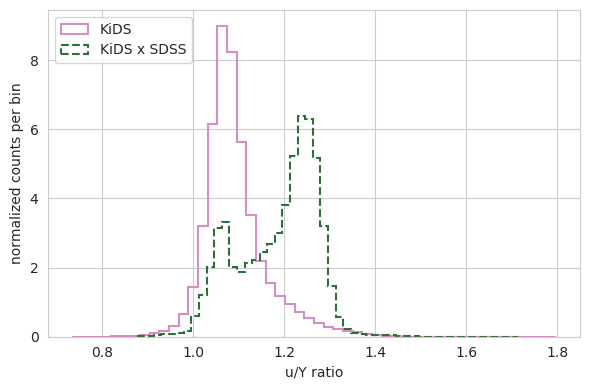

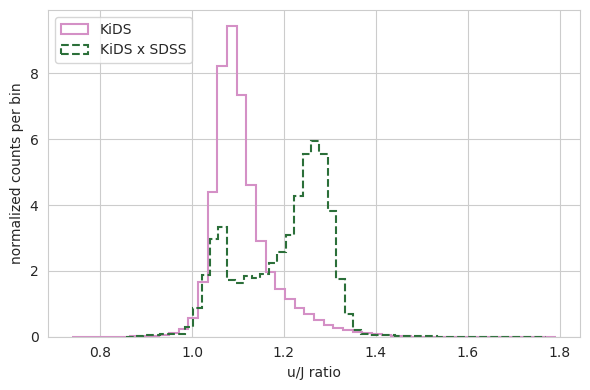

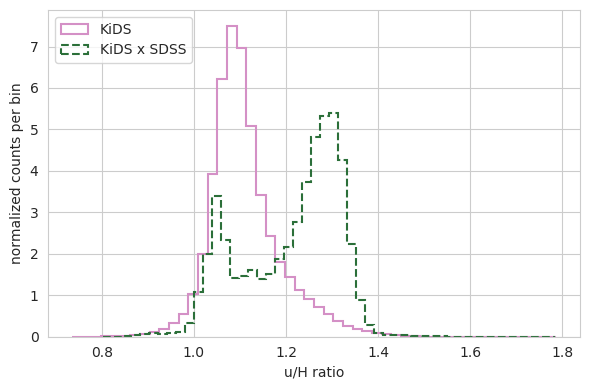

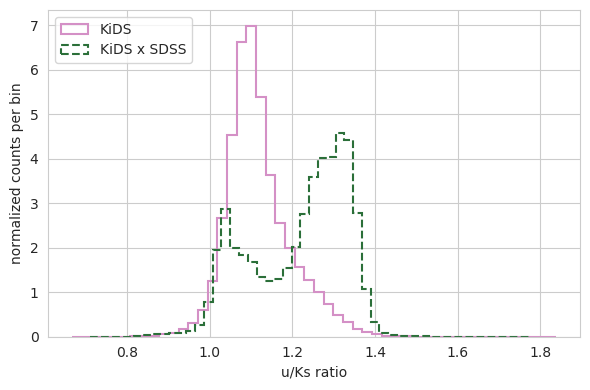

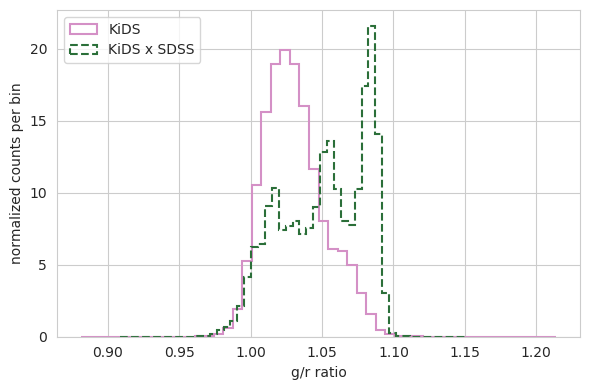

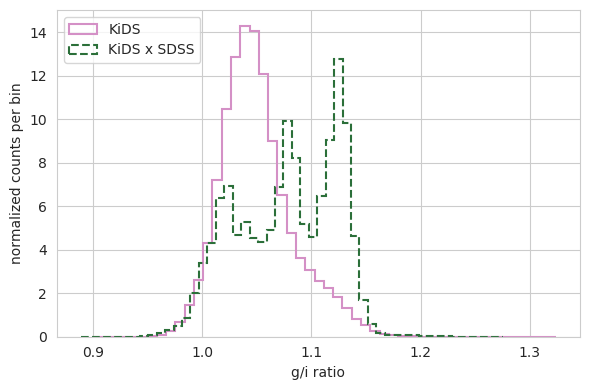

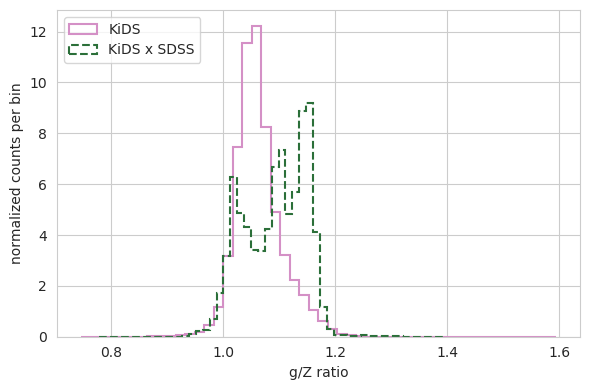

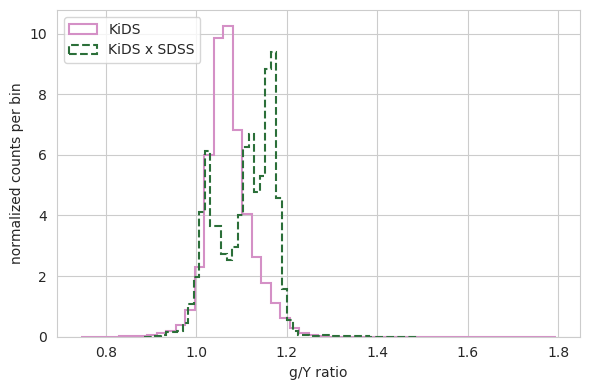

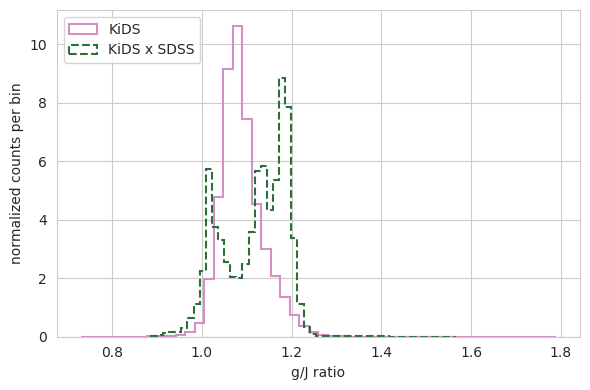

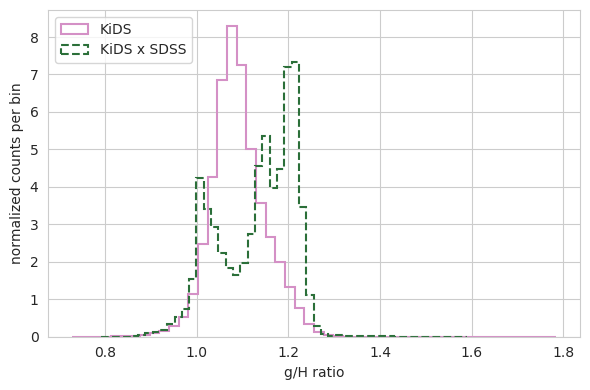

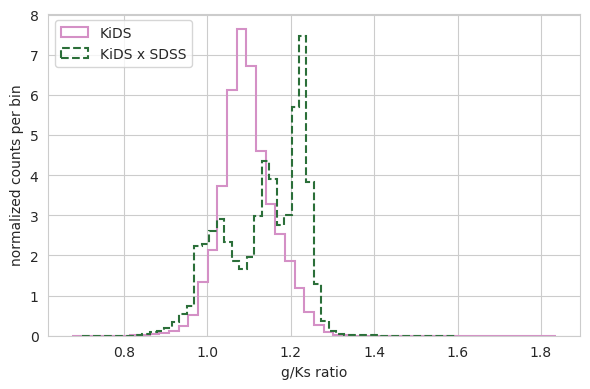

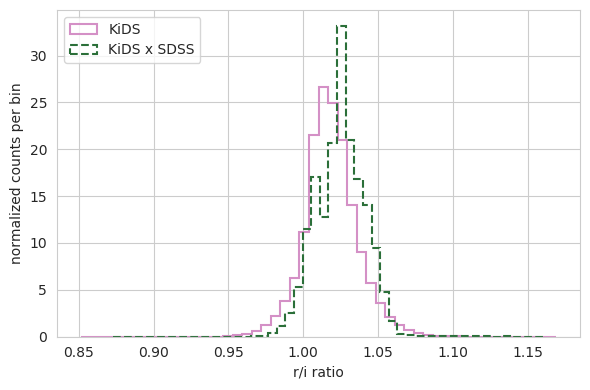

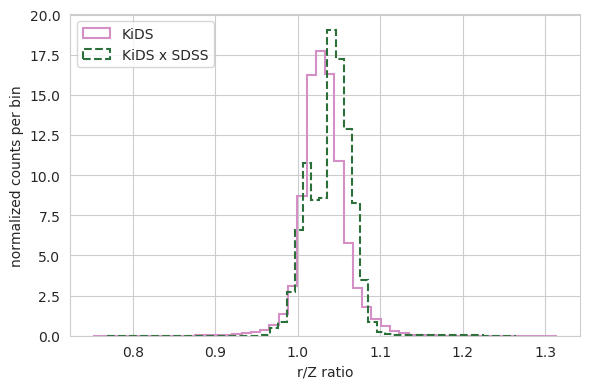

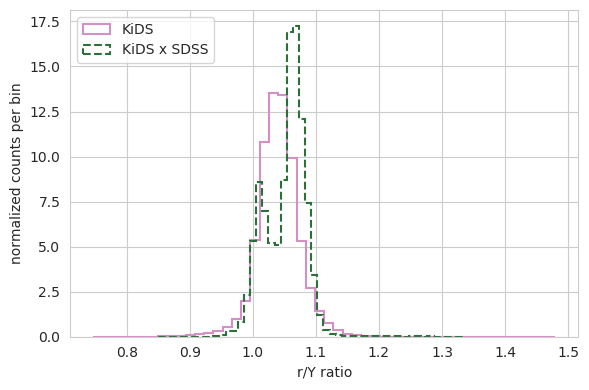

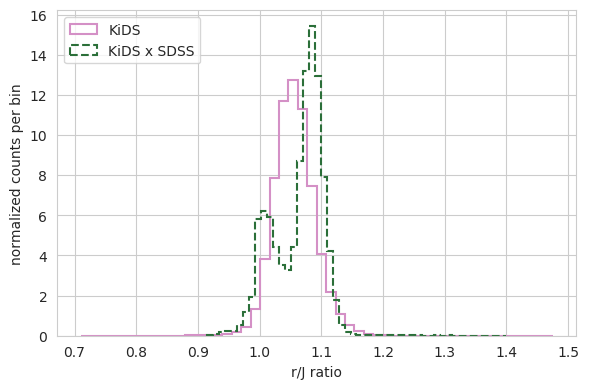

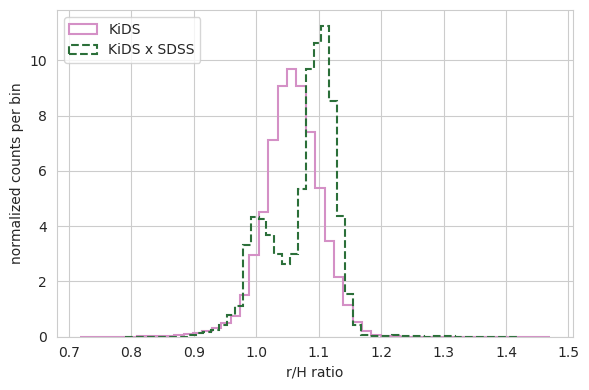

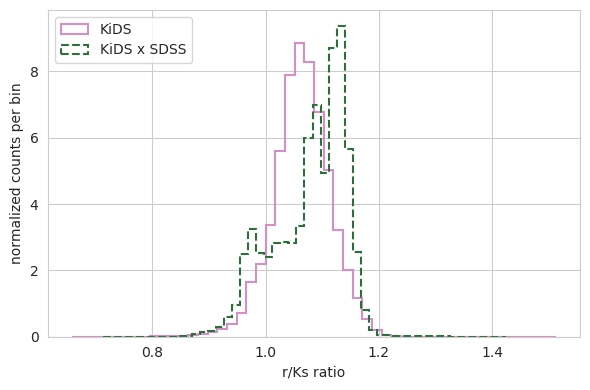

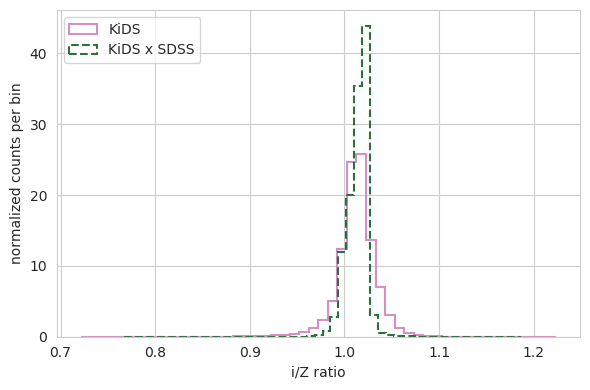

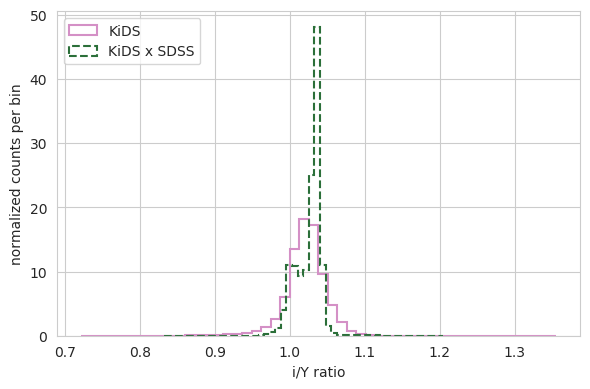

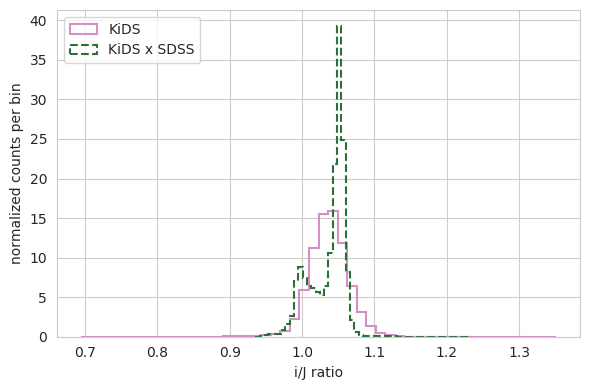

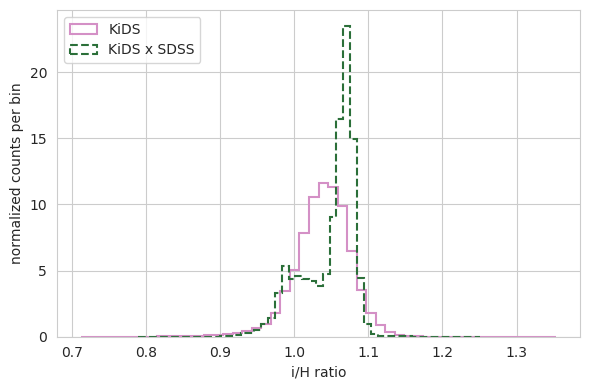

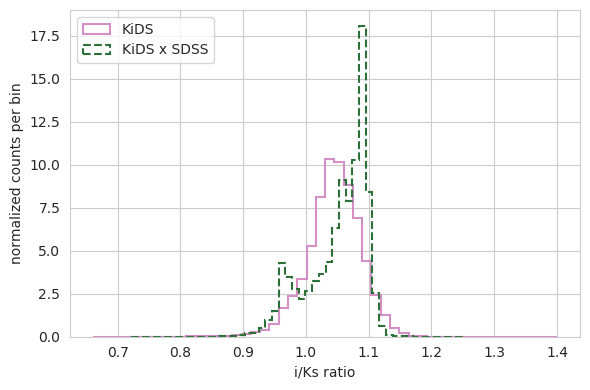

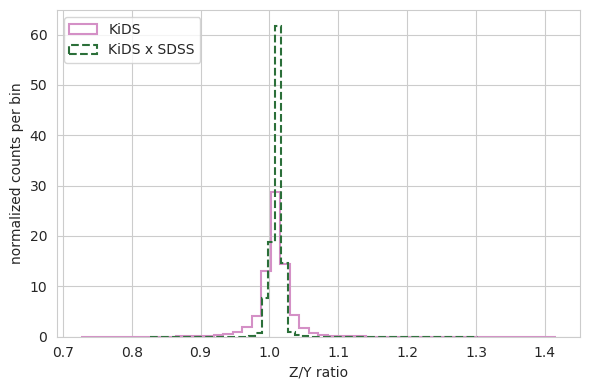

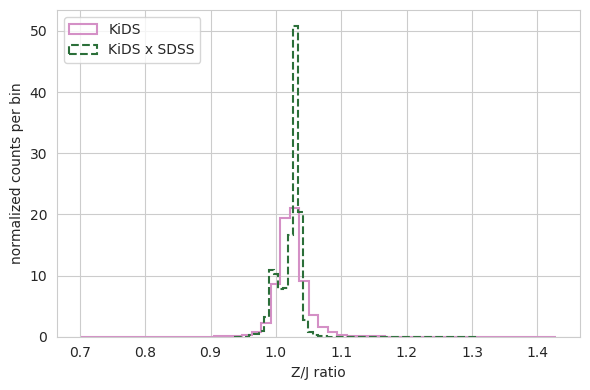

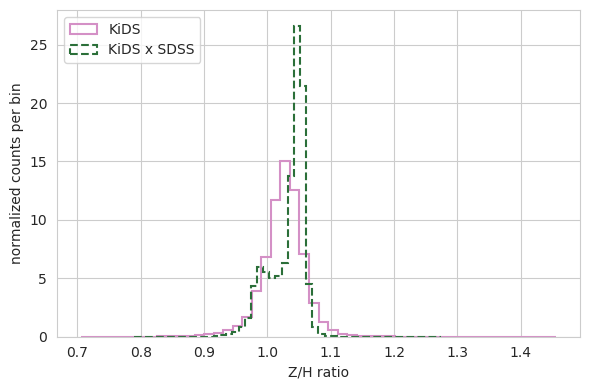

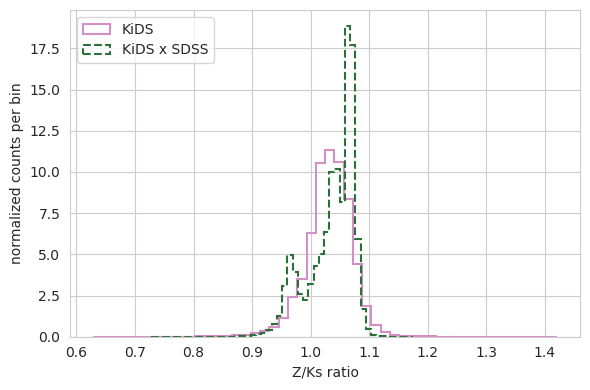

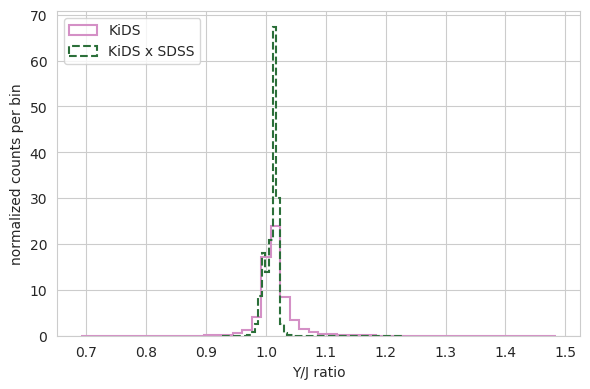

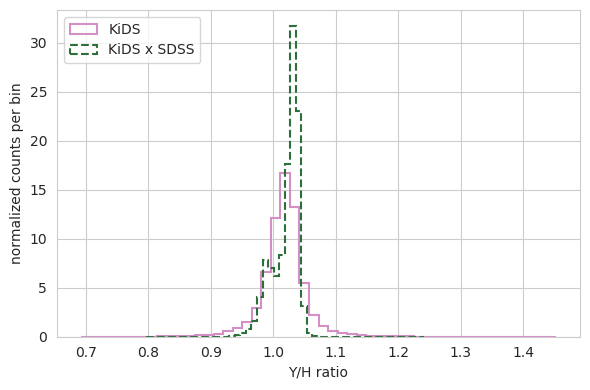

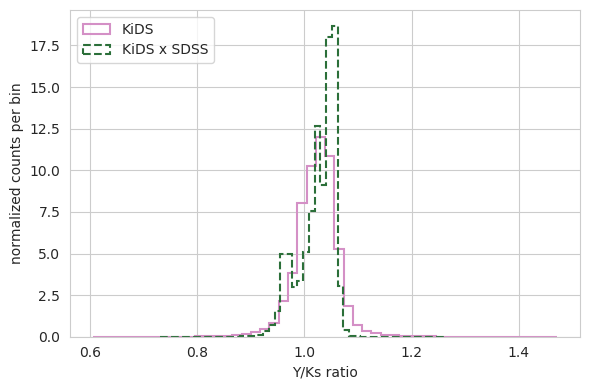

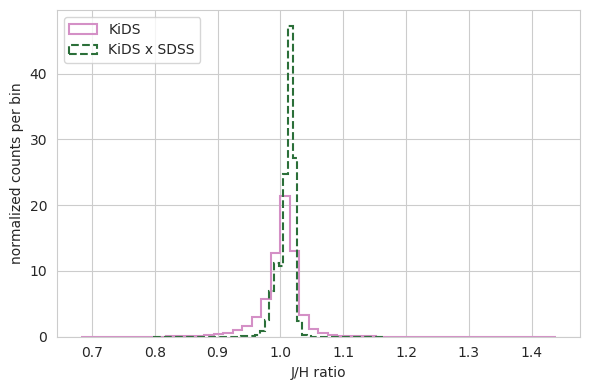

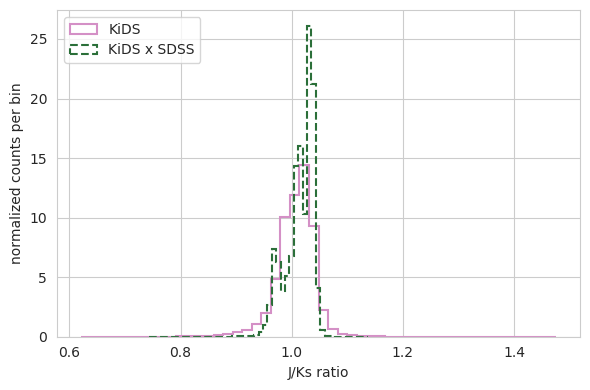

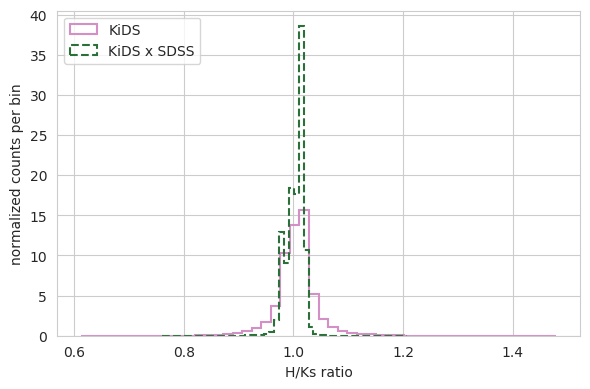

In [11]:
# Ratio histograms
data_dict = OrderedDict([('KiDS', kids), ('KiDS x SDSS', kids_x_sdss)])
plot_histograms(data_dict, RATIO_COLUMNS, legend_size=10, pretty_print_function=pretty_print_feature)